### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime
from keras.callbacks import LearningRateScheduler

sns.set_palette("Dark2")


### Reading data

In [2]:
ChurnDF = pd.read_csv("./Churn_Modelling.csv")
ChurnDF.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describing data

In [3]:
ChurnDF.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
ChurnDF.Surname.nunique()

2932

In [5]:
ChurnDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
ChurnDF.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data visualization

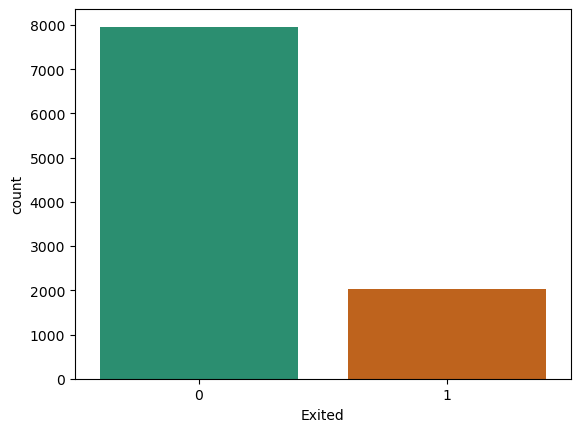

In [7]:
sns.countplot(x = "Exited", data = ChurnDF)
plt.show()

### Checking for outliers

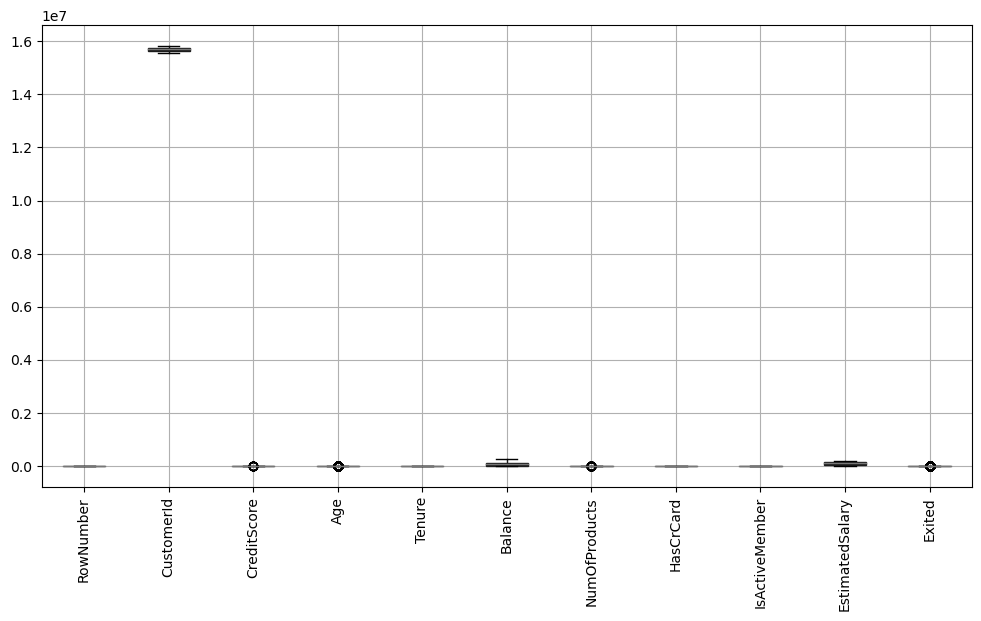

In [8]:
plt.figure(figsize=(12,6))
bplot = ChurnDF.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

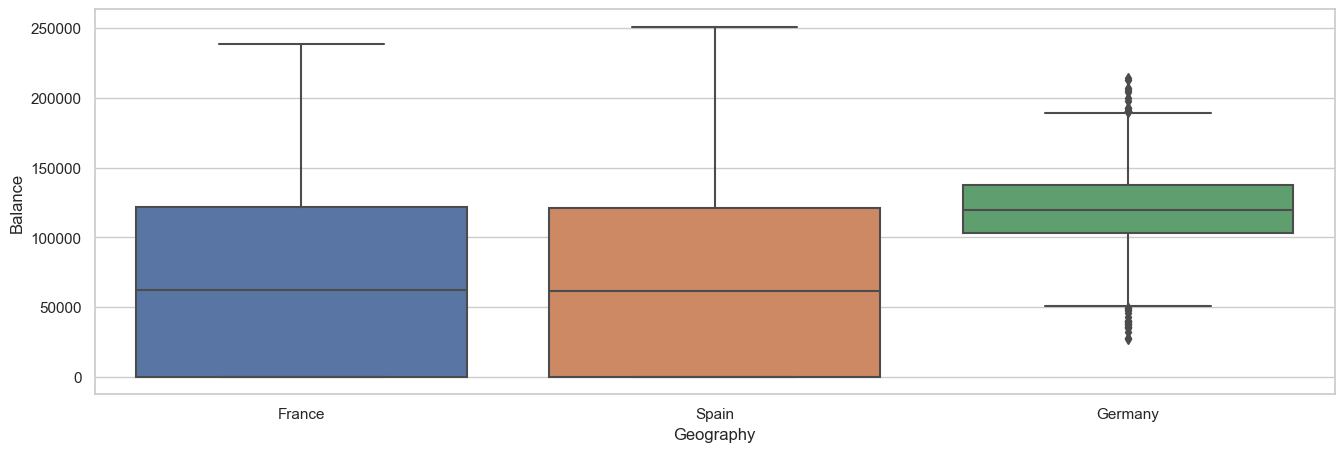

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="Geography", y="Balance", data=ChurnDF, orient="v")

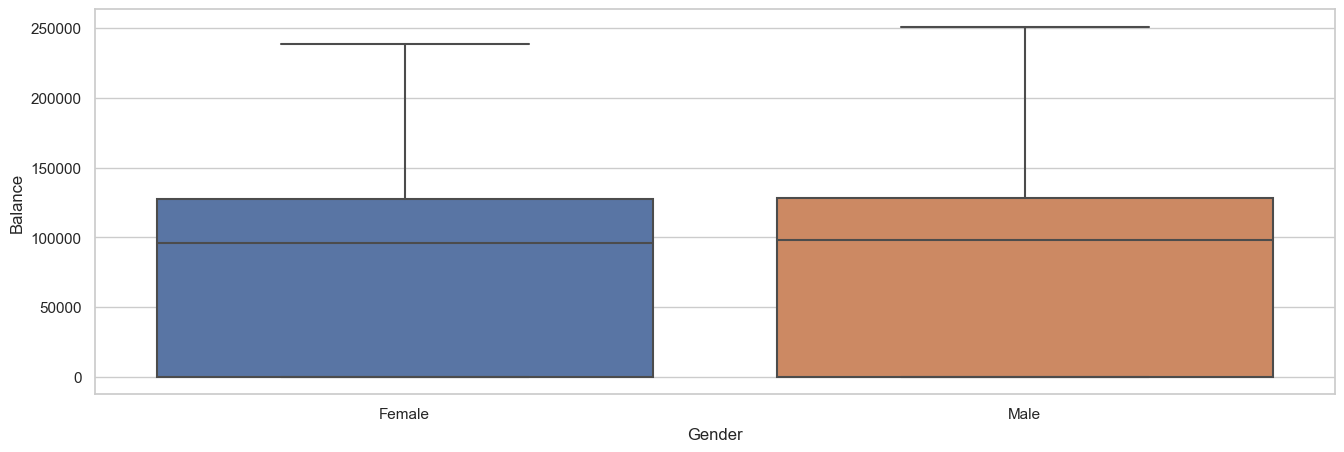

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="Gender", y="Balance", data=ChurnDF, orient="v")

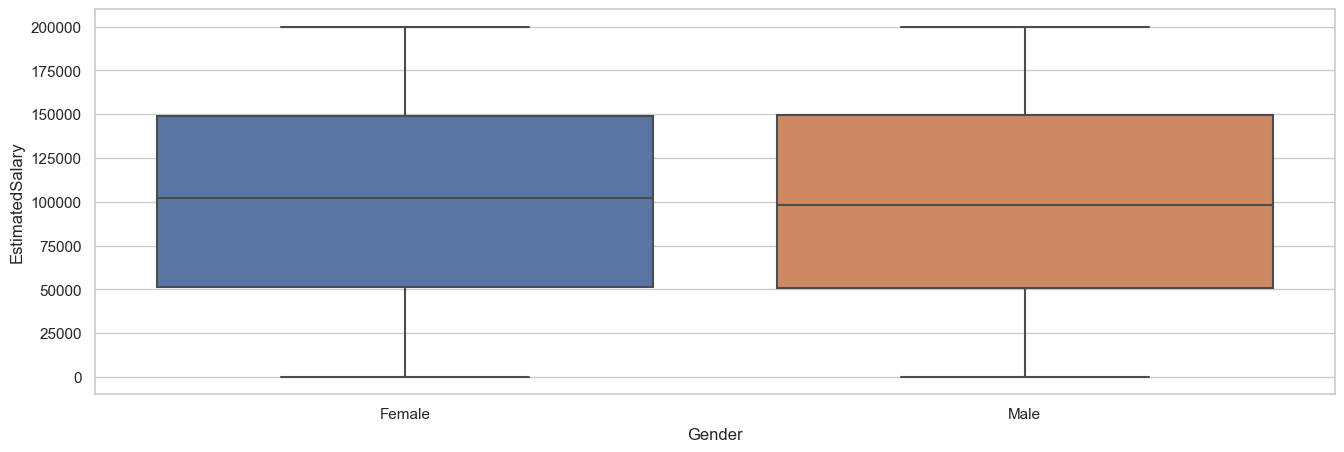

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="Gender", y="EstimatedSalary", data=ChurnDF, orient="v")

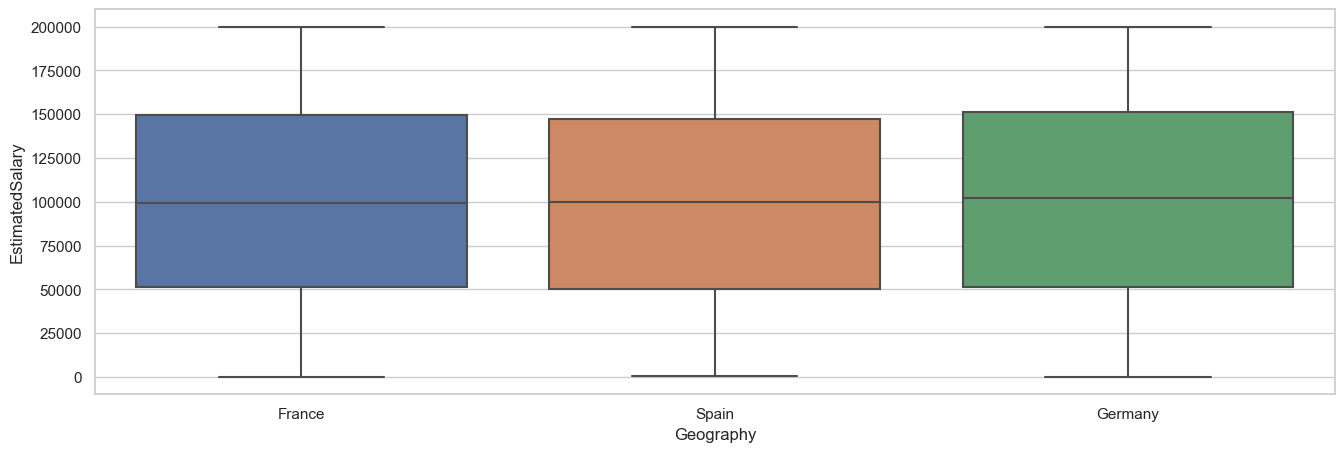

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
ax = sns.boxplot( x="Geography", y="EstimatedSalary", data=ChurnDF, orient="v")

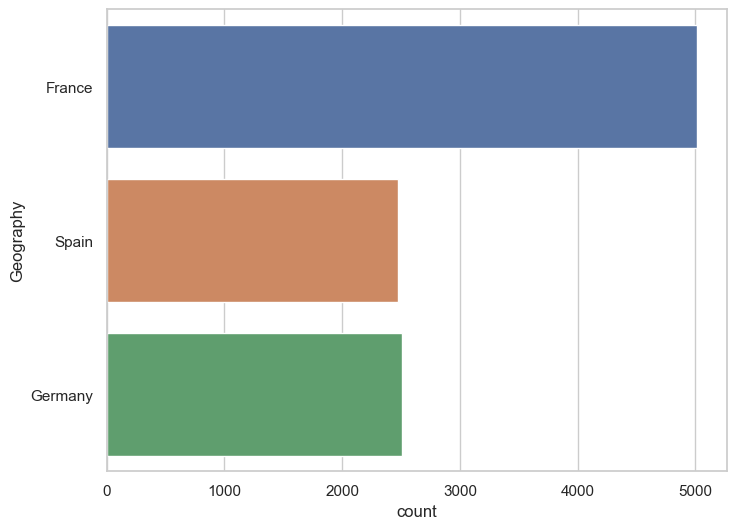

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(y='Geography', data = ChurnDF)
plt.show()

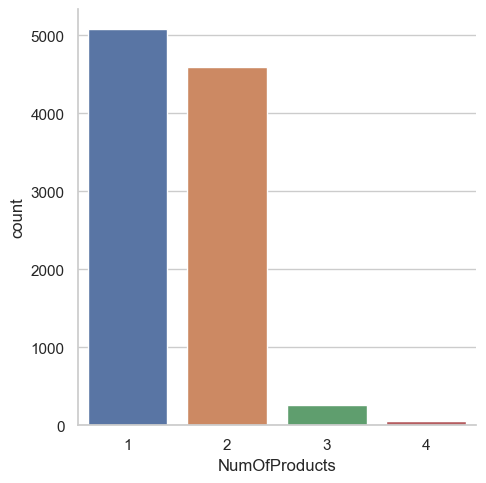

In [14]:
sns.displot(ChurnDF.EstimatedSalary)

sns.countplot(x = "NumOfProducts", data = ChurnDF)
plt.show()

<Figure size 1000x800 with 0 Axes>

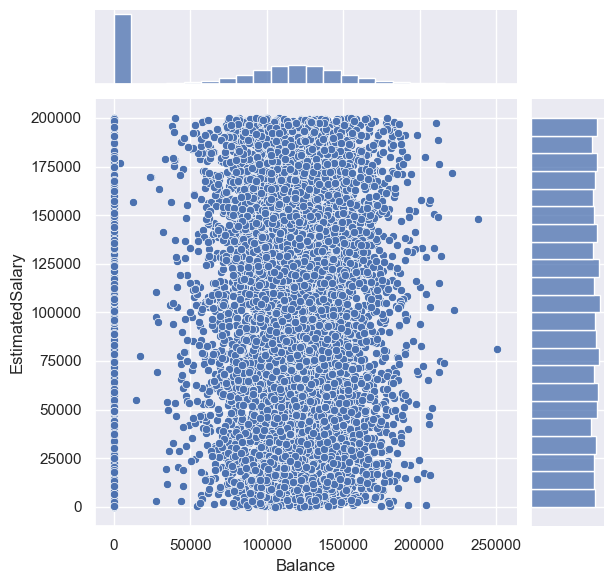

In [15]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='EstimatedSalary', x='Balance', data = ChurnDF)
plt.show()

Na ovom grafiku vidimo da postoji veliki broj outlier-a za Balance vrednost sa vrednošću 0

In [16]:
BalanceEdge = 100 
print("Number of rows with balance less than " + str(BalanceEdge) + ": " + str(len(ChurnDF[ChurnDF["Balance"] < BalanceEdge])))

Number of rows with balance less than 100: 3617


<AxesSubplot: ylabel='Balance'>

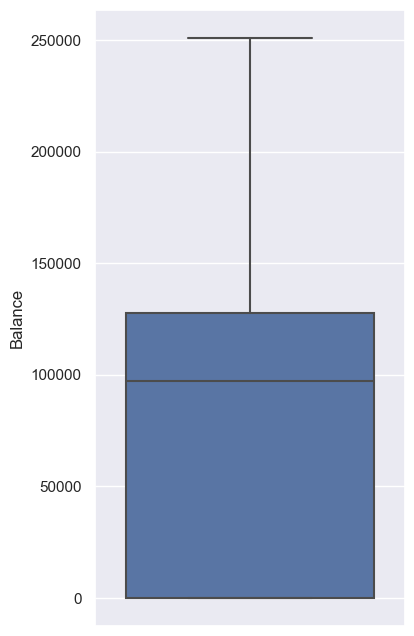

In [17]:
plt.figure(figsize = (4,8))
sns.boxplot(y = ChurnDF.Balance)

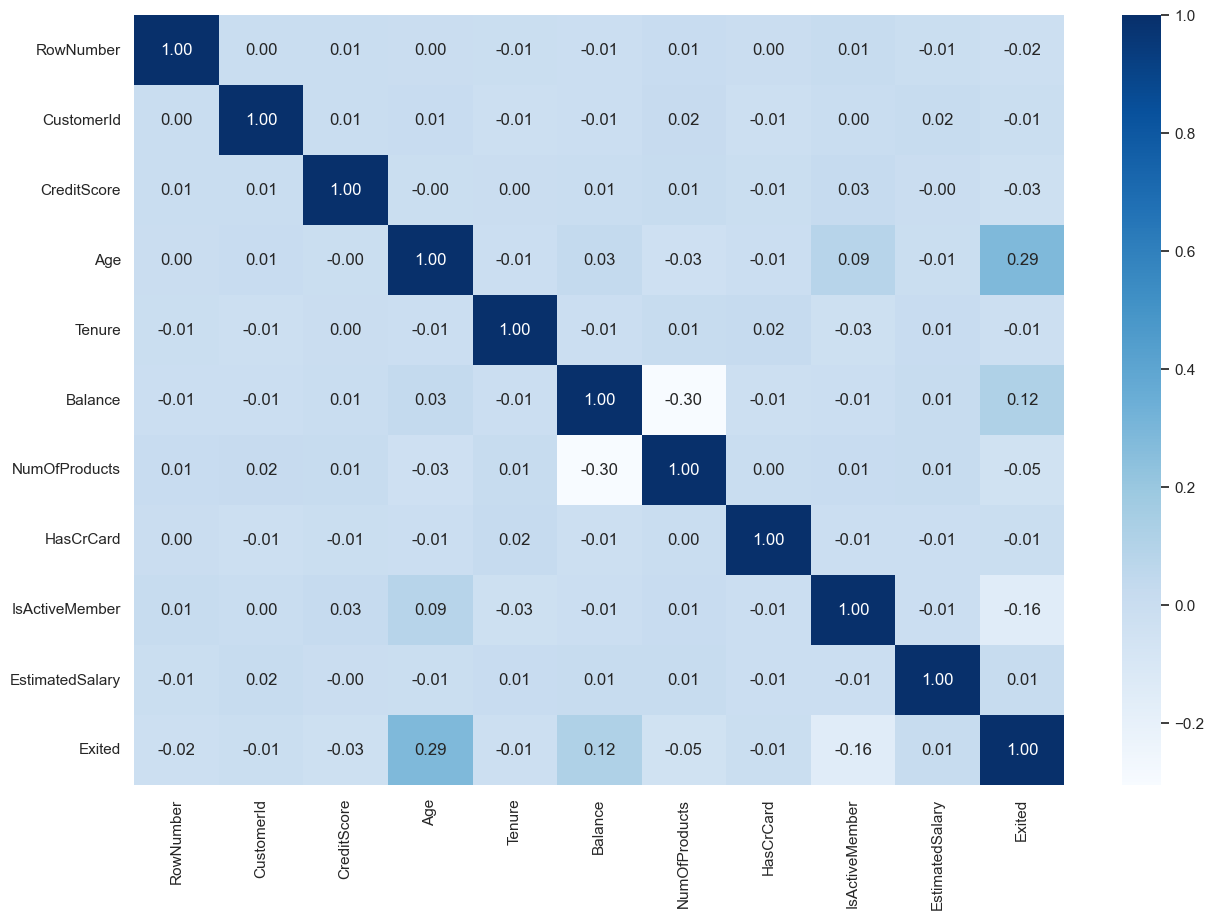

In [18]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(ChurnDF.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()


In [19]:
corr_matrix = ChurnDF.corr()

# Sort the correlation matrix in descending order
sorted_corr_matrix = corr_matrix.unstack().sort_values(ascending=False)

# Remove duplicates
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix.index.get_level_values(0) != sorted_corr_matrix.index.get_level_values(1)]

# Show the sorted list of correlations
sorted_corr_matrix.head(20)

Age              Exited             0.285323
Exited           Age                0.285323
                 Balance            0.118533
Balance          Exited             0.118533
Age              IsActiveMember     0.085472
IsActiveMember   Age                0.085472
Age              Balance            0.028308
Balance          Age                0.028308
CreditScore      IsActiveMember     0.025651
IsActiveMember   CreditScore        0.025651
HasCrCard        Tenure             0.022583
Tenure           HasCrCard          0.022583
CustomerId       NumOfProducts      0.016972
NumOfProducts    CustomerId         0.016972
EstimatedSalary  CustomerId         0.015271
CustomerId       EstimatedSalary    0.015271
NumOfProducts    EstimatedSalary    0.014204
EstimatedSalary  NumOfProducts      0.014204
Tenure           NumOfProducts      0.013444
NumOfProducts    Tenure             0.013444
dtype: float64

<Figure size 1000x800 with 0 Axes>

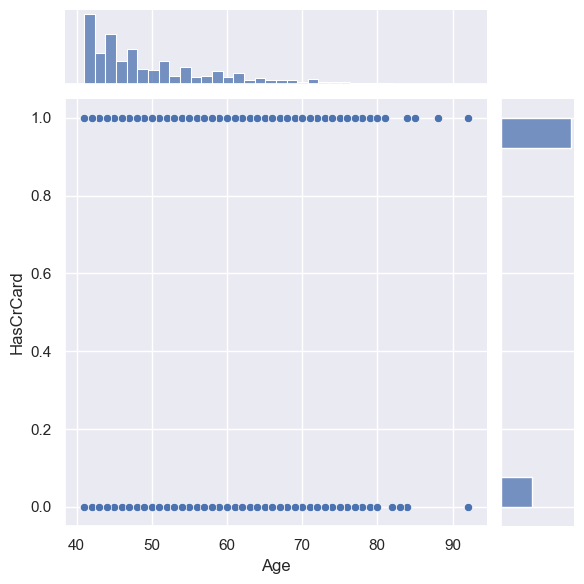

In [20]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='HasCrCard', x='Age', data = ChurnDF[ChurnDF.Age > 40])
plt.show()

array([[<AxesSubplot: title={'center': 'RowNumber'}>,
        <AxesSubplot: title={'center': 'CustomerId'}>,
        <AxesSubplot: title={'center': 'CreditScore'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'Balance'}>],
       [<AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>,
        <AxesSubplot: title={'center': 'IsActiveMember'}>],
       [<AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: title={'center': 'Exited'}>, <AxesSubplot: >]],
      dtype=object)

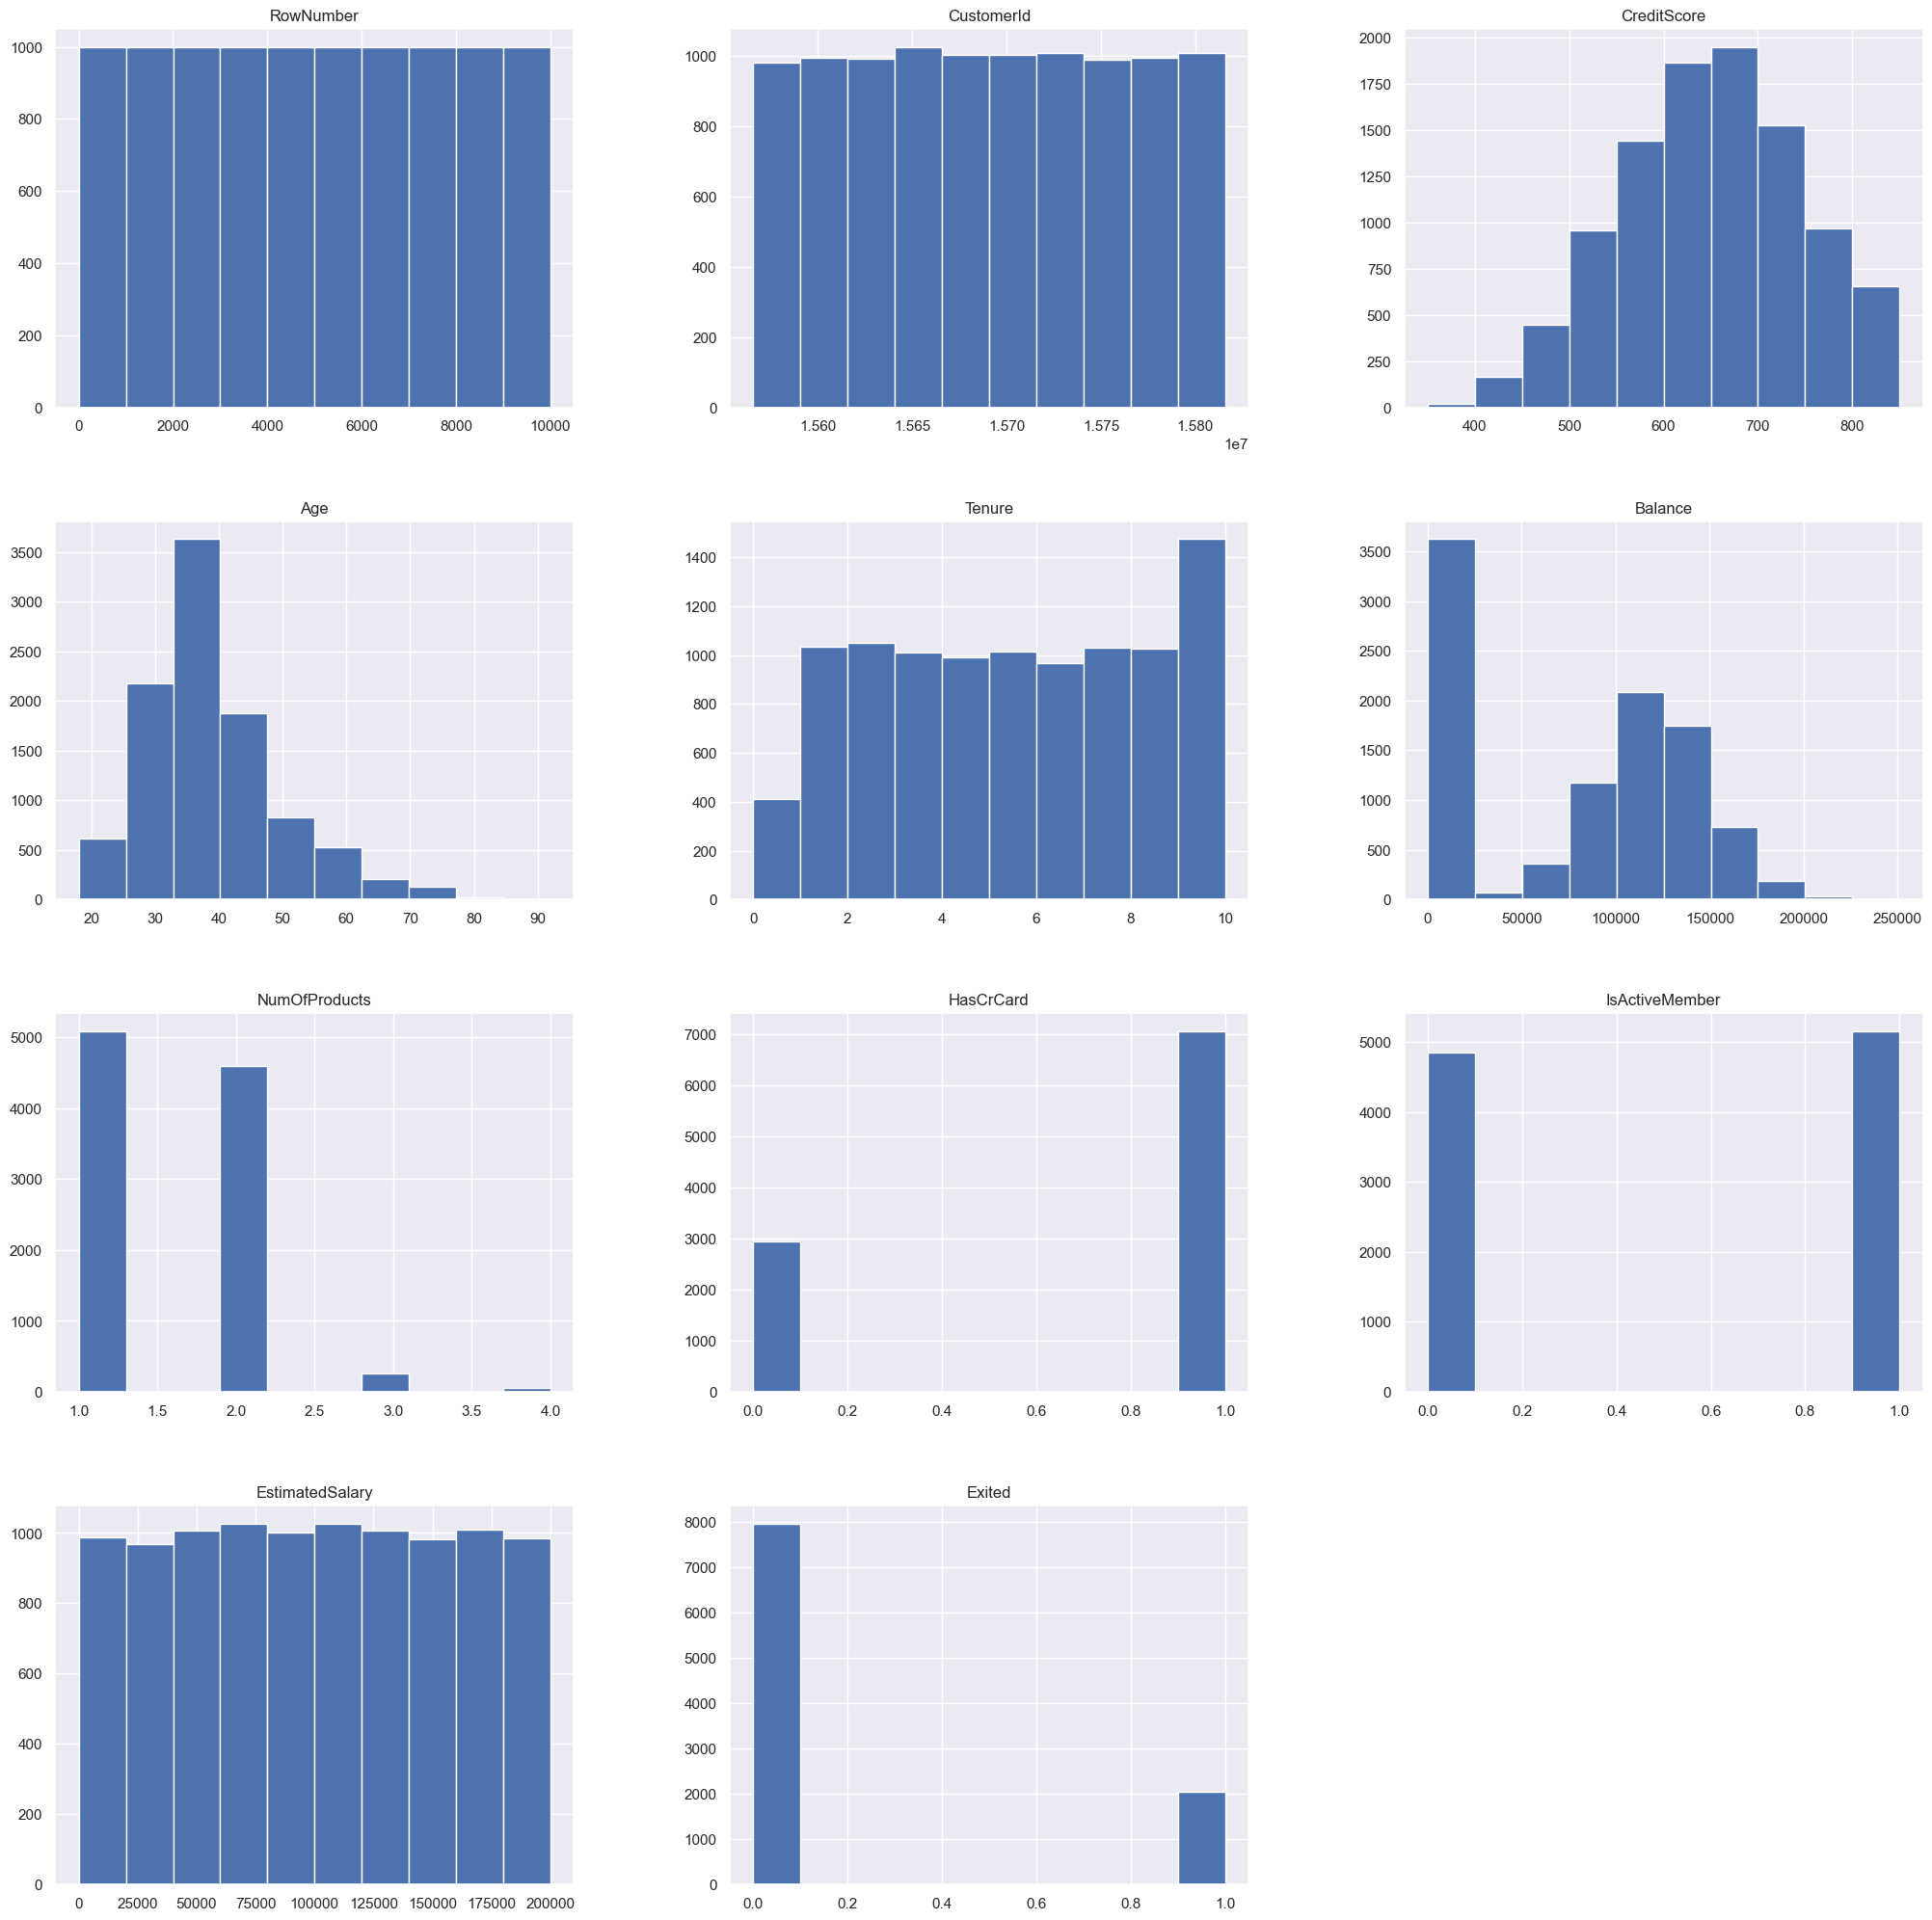

In [21]:
ChurnDF.hist(figsize = (25,25))


## Preprocessing data

### Checking for null values

In [22]:
ChurnDF.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
ChurnDF.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for duplicates

In [24]:
ChurnDF.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [25]:
ChurnDF.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Dropping unnecessary columns

In [26]:
ChurnDF.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace = True)

In [27]:
ChurnDF.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Creating subset for testing

In [28]:
ChurnDFFiltered = ChurnDF[ChurnDF.Balance > 100]
ChurnDFFiltered.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
std,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427600
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000
50%,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000
75%,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


<AxesSubplot: ylabel='Balance'>

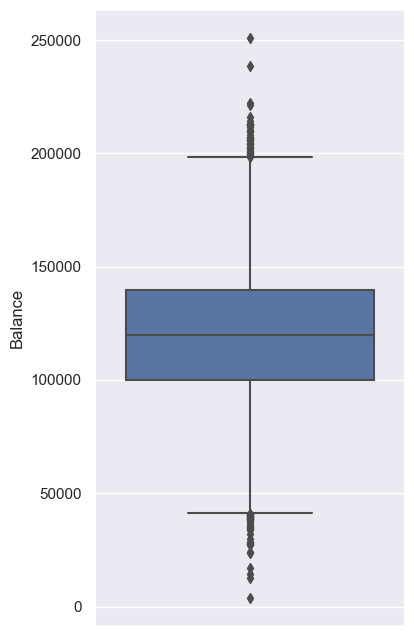

In [29]:
plt.figure(figsize = (4,8))
sns.boxplot(y = ChurnDFFiltered.Balance)

In [30]:
ChurnDFFiltered = ChurnDFFiltered[ChurnDFFiltered.Balance < 195000]
ChurnDFFiltered = ChurnDFFiltered[ChurnDFFiltered.Balance > 45000]
ChurnDFFiltered.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6287.000000,6287.000000,6287.000000,6287.000000,6287.000000,6287.000000,6287.000000,6287.000000,6287.000000
mean,651.122316,39.203595,4.982185,119860.467776,1.386035,0.700016,0.513599,100647.162605,0.238110
std,97.030676,10.475958,2.909768,28391.665263,0.576352,0.458287,0.499855,57393.791970,0.425961
min,350.000000,18.000000,0.000000,45022.230000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,100504.920000,1.000000,0.000000,0.000000,51653.760000,0.000000
50%,652.000000,38.000000,5.000000,119859.520000,1.000000,1.000000,1.000000,101069.710000,0.000000
75%,718.000000,44.000000,8.000000,139129.680000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,194532.660000,4.000000,1.000000,1.000000,199970.740000,1.000000


<AxesSubplot: ylabel='Balance'>

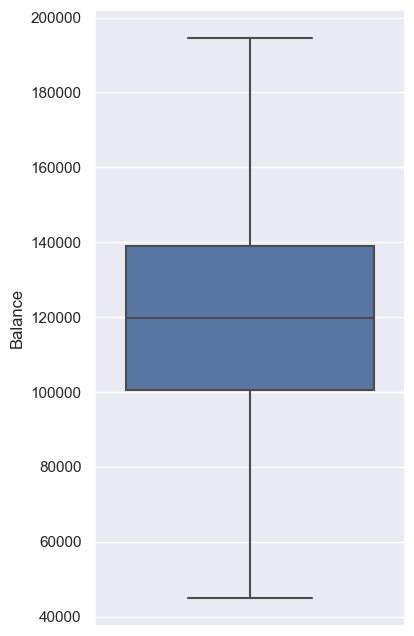

In [31]:
plt.figure(figsize = (4,8))
sns.boxplot(y = ChurnDFFiltered.Balance)


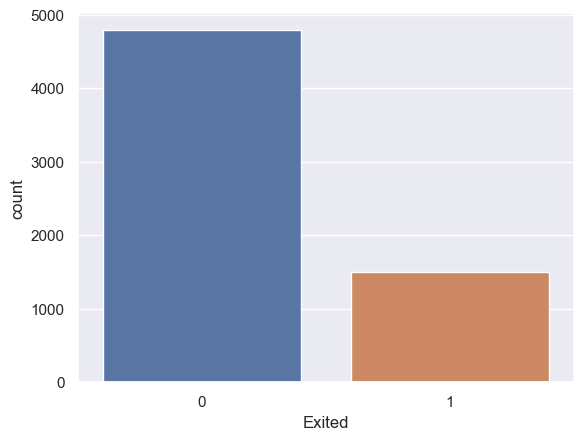

In [32]:
sns.countplot(x = "Exited", data = ChurnDFFiltered)
plt.show()

<AxesSubplot: xlabel='HasCrCard', ylabel='Age'>

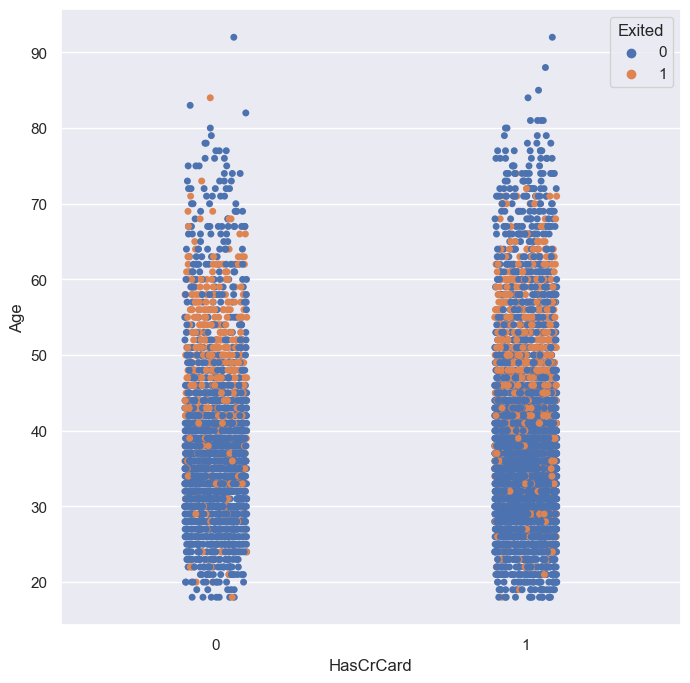

In [33]:
plt.figure(figsize=(8, 8))
sns.stripplot(x = "HasCrCard", y = "Age", data = ChurnDF, hue="Exited")

### One Hot Encoding

In [34]:
def OneHotEncode(dataset):
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    columnsToEncode = ['Geography','Gender']
    OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[columnsToEncode]))

    # One-hot encoding removed index; put it back
    OH_cols.index = dataset.index
    column_name = OH_encoder.get_feature_names_out(columnsToEncode)
    OH_cols.columns = column_name

    # Remove categorical columns (will replace with one-hot encoding)
    num_X = dataset.drop(columnsToEncode, axis=1)
    OH_X = pd.concat([num_X, OH_cols], axis=1)
    #one_hot_encoded_frame = pd.DataFrame.sparse.from_spmatrix(OH_X, columns= column_name)

    dataset=OH_X
    OH_cols = pd.DataFrame(dataset[['Exited']])
    num_X = dataset.drop("Exited", axis=1)
    Odf_X = pd.concat([num_X, OH_cols], axis=1)
    dataset=Odf_X.copy()
    return dataset

In [35]:
ChurnDfEncoded = OneHotEncode(ChurnDF)
ChurnDfEncoded.head()

c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0,1
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0,0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0,1
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0,0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0,0


In [36]:
ChurnDfFilteredEncoded = OneHotEncode(ChurnDFFiltered)
ChurnDfFilteredEncoded.head()

c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0,0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0,1
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0,0
5,645,44,8,113755.78,2,1,0,149756.71,0.0,0.0,1.0,0.0,1.0,1
7,376,29,4,115046.74,4,1,0,119346.88,0.0,1.0,0.0,1.0,0.0,1


### Scaling columns

In [37]:
def ScaleColumns(dataset):
    columnsForScaling = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
    for columnForScaling in columnsForScaling:
        dataset[columnForScaling] = (dataset[columnForScaling] - np.min(dataset[columnForScaling])) / \
            (np.max(dataset[columnForScaling])-np.min(dataset[columnForScaling]))
    return dataset

In [38]:
ChurnDFEncodedScaled = ScaleColumns(ChurnDfEncoded)
ChurnDFEncodedScaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1.0,0.0,0.0,1.0,0.0,1
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0.0,0.0,1.0,1.0,0.0,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1.0,0.0,0.0,1.0,0.0,1
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,1.0,0.0,0.0,1.0,0.0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0.0,0.0,1.0,1.0,0.0,0


In [39]:
ChurnDFFilteredEncodedScaled = ScaleColumns(ChurnDfFilteredEncoded)
ChurnDFFilteredEncodedScaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
1,0.516,0.310811,0.1,0.259418,1,0,1,0.562770,0.0,0.0,1.0,1.0,0.0,0
2,0.304,0.324324,0.8,0.766760,3,1,0,0.569716,1.0,0.0,0.0,1.0,0.0,1
4,1.000,0.337838,0.2,0.538348,1,1,1,0.395443,0.0,0.0,1.0,1.0,0.0,0
5,0.590,0.351351,0.8,0.459724,2,1,0,0.748879,0.0,0.0,1.0,0.0,1.0,1
7,0.052,0.148649,0.4,0.468359,4,1,0,0.596798,0.0,1.0,0.0,1.0,0.0,1


In [40]:
ChurnDF.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
# plt.figure(figsize=(10,8))
# sns.set_style('darkgrid')
# sns.jointplot(y='EstimatedSalary', x='Balance', data = ChurnDFFilteredEncodedScaled)
# plt.show()

### Balancing dataset

In [42]:
less = len(ChurnDFEncodedScaled[ChurnDFEncodedScaled['Exited'] == 1])
more = len(ChurnDFEncodedScaled[ChurnDFEncodedScaled['Exited'] == 0])
class_distribution_ration = less/more
x = ChurnDFEncodedScaled.drop(["Exited"], axis = 1)
y = ChurnDFEncodedScaled["Exited"]

#Transformacija dataset-a
# oversampling
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

frames = [X, Y]
ChurnDFBalanced = pd.concat(frames, axis=1, join='inner')



In [43]:
ChurnDFEncodedScaled.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,1.530200,0.70550,0.515100,0.500441,0.501400,0.250900,0.247700,0.454300,0.545700,0.203700
std,0.193307,0.141727,0.289217,0.248696,0.581654,0.45584,0.499797,0.287580,0.500023,0.433553,0.431698,0.497932,0.497932,0.402769
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.500000,0.387402,1.000000,1.00000,1.000000,0.500960,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.736000,0.351351,0.700000,0.508749,2.000000,1.00000,1.000000,0.746955,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting data

In [44]:
target = 'Exited'

y = ChurnDFEncodedScaled[target]
X = ChurnDFEncodedScaled.drop(columns=[target])
# Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


y_balanced = ChurnDFBalanced[target]
X_balanced = ChurnDFBalanced.drop(columns=[target])
# Split balanced data
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_balanced, y_train_balanced, test_size=0.3, random_state=42)

# For original data
print("Length of X_train: ", len(X_train), "\tLength of X_val: ", len(X_val), "\tLength of X_test: ", len(X_test))
print("Length of y_train: ", len(y_train), "\tLength of y_val: ", len(y_val), "\tLength of y_test: ", len(y_test))
print("Shape of X_train: ", np.shape(X_train), "\tShape of y_train: ", np.shape(y_train))

# For balanced data
print("\nBalanced Data:")
print("Length of X_train_balanced: ", len(X_train_balanced), "\tLength of X_val_balanced: ", len(X_val_balanced), "\tLength of X_test_balanced: ", len(X_test_balanced))
print("Length of y_train_balanced: ", len(y_train_balanced), "\tLength of y_val_balanced: ", len(y_val_balanced), "\tLength of y_test_balanced: ", len(y_test_balanced))
print("Shape of X_train_balanced: ", np.shape(X_train_balanced), "\tShape of y_train_balanced: ", np.shape(y_train_balanced))




Length of X_train:  5600 	Length of X_val:  2400 	Length of X_test:  2000
Length of y_train:  5600 	Length of y_val:  2400 	Length of y_test:  2000
Shape of X_train:  (5600, 13) 	Shape of y_train:  (5600,)

Balanced Data:
Length of X_train_balanced:  8918 	Length of X_val_balanced:  3822 	Length of X_test_balanced:  3186
Length of y_train_balanced:  8918 	Length of y_val_balanced:  3822 	Length of y_test_balanced:  3186
Shape of X_train_balanced:  (8918, 13) 	Shape of y_train_balanced:  (8918,)


### Scaling of data

In [45]:
def scale_data(X_train, X_val, X_test, y_train, y_val, y_test, scaler_type):
    if scaler_type == "StandardScaler":
        scaler = StandardScaler()
    elif scaler_type == "MinMaxScaler":
        scaler = MinMaxScaler()
    else:
        raise ValueError("Scaler type not recognized.")
    
    # Scale the original data
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns.values)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

    # Scale the balanced data
    X_train_balanced_scaled = pd.DataFrame(scaler.fit_transform(X_train_balanced), columns=X_train_balanced.columns.values)
    X_val_balanced_scaled = pd.DataFrame(scaler.transform(X_val_balanced), columns=X_val_balanced.columns.values)
    X_test_balanced_scaled = pd.DataFrame(scaler.transform(X_test_balanced), columns=X_test_balanced.columns.values)

    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, X_train_balanced_scaled, X_val_balanced_scaled, X_test_balanced_scaled, y_train_balanced, y_val_balanced, y_test_balanced


In [46]:
X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, X_train_balanced_scaled, X_val_balanced_scaled, X_test_balanced_scaled, y_train_balanced, y_val_balanced, y_test_balanced = scale_data(X_train, X_val, X_test, y_train, y_val, y_test, "MinMaxScaler")


In [47]:
X_train_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.346,0.261538,0.8,0.582173,0.000000,1.0,1.0,0.930700,0.0,1.0,0.0,0.0,1.0
1,0.474,0.261538,0.3,0.349375,0.000000,1.0,0.0,0.627692,0.0,0.0,1.0,1.0,0.0
2,0.612,0.338462,0.2,0.000000,0.333333,1.0,1.0,0.902856,1.0,0.0,0.0,0.0,1.0
3,0.454,0.276923,0.3,0.507965,0.333333,0.0,1.0,0.718896,1.0,0.0,0.0,0.0,1.0
4,0.046,0.369231,0.7,0.000000,0.000000,1.0,0.0,0.388713,1.0,0.0,0.0,0.0,1.0


### Classifiers

In [48]:
def model_accuracy(model, X_train, y_train, X_test, y_test, **kwargs):
    clf = model(**kwargs)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

models = {
    'KNN': KNeighborsClassifier,
    'Gaussian Naive Bayes': GaussianNB,
    'SVM': SVC,
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier
}

imbalanced_data_results = []
balanced_data_results = []

for model_name, model in models.items():
    accuracy_imbalanced = model_accuracy(model, X_train_scaled, y_train, X_test_scaled, y_test, n_neighbors=3) if model_name == 'KNN' else model_accuracy(model, X_train_scaled, y_train, X_test_scaled, y_test)
    imbalanced_data_results.append({'Model': model_name, 'Accuracy': accuracy_imbalanced})
    accuracy_balanced = model_accuracy(model, X_train_balanced_scaled, y_train_balanced, X_test_balanced_scaled, y_test_balanced, n_neighbors=3) if model_name == 'KNN' else model_accuracy(model, X_train_balanced_scaled, y_train_balanced, X_test_balanced_scaled, y_test_balanced)
    balanced_data_results.append({'Model': model_name, 'Accuracy': accuracy_balanced})

imbalanced_data_results = pd.DataFrame(imbalanced_data_results).sort_values('Accuracy', ascending=False)
balanced_data_results = pd.DataFrame(balanced_data_results).sort_values('Accuracy', ascending=False)

print("Accuracy for imbalanced data:")
print(imbalanced_data_results.head(6))

print("\nAccuracy for balanced data:")
print(balanced_data_results.head(6))


Accuracy for imbalanced data:
                  Model  Accuracy
5         Random Forest    0.8620
2                   SVM    0.8365
1  Gaussian Naive Bayes    0.8255
3   Logistic Regression    0.8145
0                   KNN    0.8085
4         Decision Tree    0.7885

Accuracy for balanced data:
                  Model  Accuracy
5         Random Forest  0.876648
0                   KNN  0.820778
4         Decision Tree  0.800063
2                   SVM  0.773384
1  Gaussian Naive Bayes  0.721594
3   Logistic Regression  0.709981


## Creating Artificial Neural Network Models

### Helper functions

In [49]:
def printHistory(history_):
    training_loss = history_.history["loss"]
    test_loss = history_.history["val_loss"]
    training_accuracy = history_.history["accuracy"]
    test_accuracy = history_.history["val_accuracy"]

    epoch_count = range(1, len(training_loss) + 1)

    fig = plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_count, training_loss, "r--")
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Val Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")
    plt.legend(["Training Accuracy", "Val Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")

    plt.show()


### Creating different models

### Overfitting - more layers and epochs, without dropout and kernel regularization

In [50]:
def createNetwork(X_train, loss="binary_crossentropy", learning_rate=0.0005, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
  
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    
    return network_

In [51]:
network=createNetwork(X_train_scaled)

history = network.fit(X_train_scaled,
                            y_train,
                            epochs=50,
                            verbose=1,
                            batch_size=64,
                            #validation_split=0.3
                            validation_data=(X_val_scaled, y_val),
                            )


Epoch 1/50
88/88 [==============================] - 5s 18ms/step - loss: 0.5586 - accuracy: 0.7927 - val_loss: 0.4980 - val_accuracy: 0.7900
Epoch 2/50
88/88 [==============================] - 1s 9ms/step - loss: 0.4861 - accuracy: 0.7964 - val_loss: 0.4732 - val_accuracy: 0.7900
Epoch 3/50
88/88 [==============================] - 1s 10ms/step - loss: 0.4722 - accuracy: 0.7964 - val_loss: 0.4609 - val_accuracy: 0.7900
Epoch 4/50
88/88 [==============================] - 1s 10ms/step - loss: 0.4611 - accuracy: 0.7964 - val_loss: 0.4483 - val_accuracy: 0.7900
Epoch 5/50
88/88 [==============================] - 1s 10ms/step - loss: 0.4473 - accuracy: 0.8027 - val_loss: 0.4333 - val_accuracy: 0.8092
Epoch 6/50
88/88 [==============================] - 1s 11ms/step - loss: 0.4293 - accuracy: 0.8211 - val_loss: 0.4226 - val_accuracy: 0.8079
Epoch 7/50
88/88 [==============================] - 1s 9ms/step - loss: 0.4170 - accuracy: 0.8254 - val_loss: 0.4137 - val_accuracy: 0.8238
Epoch 8/50
88/8

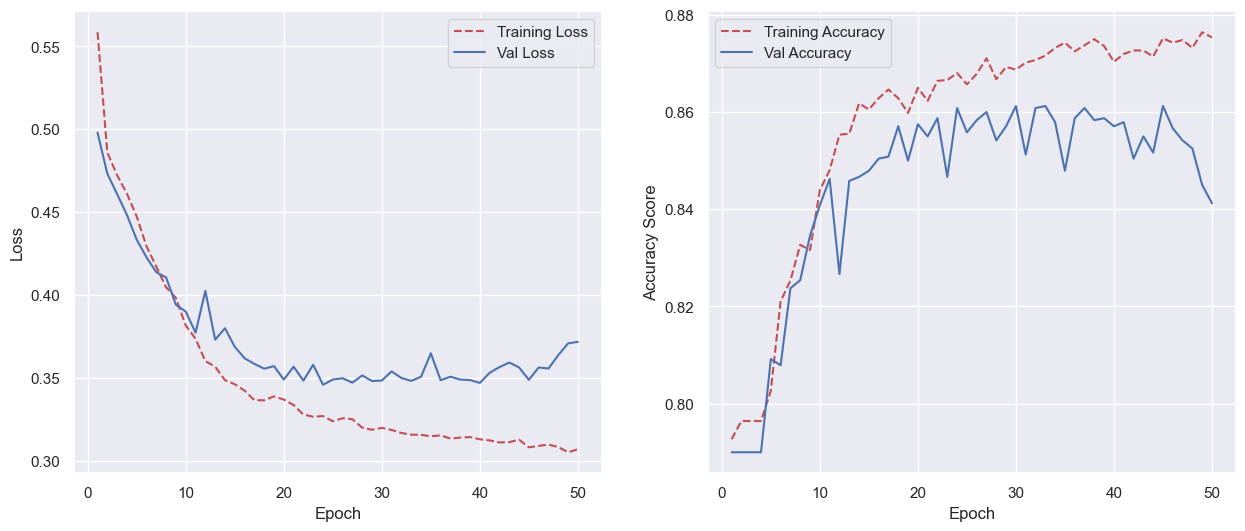

In [52]:
printHistory(history)

In [84]:
def printHistory2(history_):
    training_loss = history_.history["loss"]
    test_loss = history_.history["val_loss"]
    training_accuracy = history_.history["accuracy"]
    test_accuracy = history_.history["val_accuracy"]
    lr_values = history_.history["lr"]

    epoch_count = range(1, len(training_loss) + 1)

    fig = plt.figure(figsize=(20, 6))

    plt.subplot(1, 3, 1)
    plt.plot(epoch_count, training_loss, "r--")
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Val Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(1, 3, 2)
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")
    plt.legend(["Training Accuracy", "Val Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")

    plt.subplot(1, 3, 3)
    plt.plot(epoch_count, lr_values, "g-")
    plt.legend(["Learning Rate"])
    plt.xlabel("Epoch")
    plt.ylabel("Learning Rate")

    plt.show()


### Regularization layer with dropout 0.3

Epoch 1/25
88/88 [==============================] - 13s 81ms/step - loss: 0.6800 - accuracy: 0.7450 - val_loss: 0.6411 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 2/25
88/88 [==============================] - 2s 22ms/step - loss: 0.5476 - accuracy: 0.7964 - val_loss: 0.4898 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 3/25
88/88 [==============================] - 1s 17ms/step - loss: 0.5016 - accuracy: 0.7964 - val_loss: 0.4668 - val_accuracy: 0.7921 - lr: 0.0010
Epoch 4/25
88/88 [==============================] - 5s 53ms/step - loss: 0.4904 - accuracy: 0.8027 - val_loss: 0.4469 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 5/25
88/88 [==============================] - 4s 39ms/step - loss: 0.4728 - accuracy: 0.8104 - val_loss: 0.4411 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 6/25
88/88 [==============================] - 5s 62ms/step - loss: 0.4649 - accuracy: 0.8191 - val_loss: 0.4339 - val_accuracy: 0.8112 - lr: 9.5000e-04
Epoch 7/25
88/88 [==============================] - 1s 15ms/step - loss

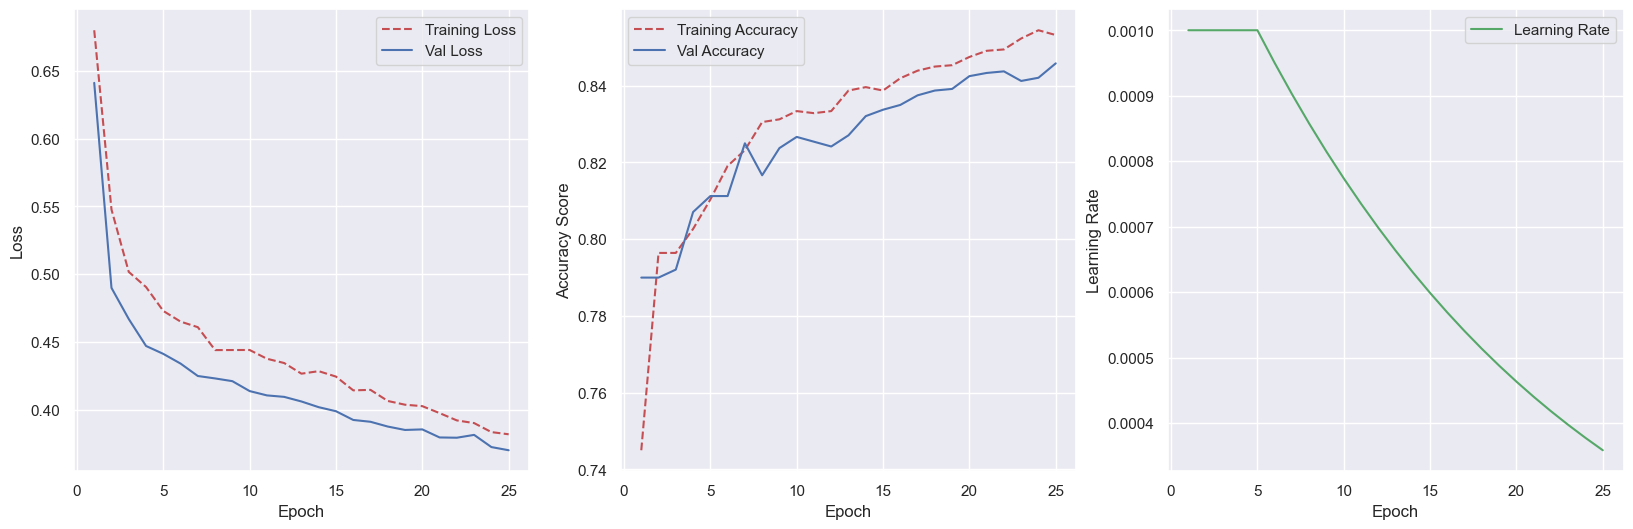

In [86]:
def createNetwork(X_train, loss="binary_crossentropy", learning_rate=0.001, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    
    return network_

# Define the learning rate schedule function
def schedule(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * 0.95

# Set the initial learning rate and create the optimizer
#learning_rate = 0.0005
#optimizer = Adam(learning_rate=learning_rate)

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(schedule)

# Train the model with the learning rate scheduler callback
network=createNetwork(X_train_scaled)
history = network.fit(X_train_scaled,
                            y_train,
                            epochs=25,
                            verbose=1,
                            batch_size=64,
                            #validation_split=0.3
                            validation_data=(X_val_scaled, y_val),
                            callbacks=[lr_scheduler]
                            )
printHistory2(history)


### Checking model on test data

In [54]:
y_pred = network.predict(X_test_scaled)
test_loss, test_acc = network.evaluate(X_test_scaled, y_test)

63/63 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8555


### Custom loss function - focal loss

In [55]:
from keras import backend as K
# gamma - higher gamma makes loss function more selective
# alpha - controls the balance between positive and negative examples in loss function
def custom_loss(y_true, y_pred, gamma=2, alpha=0.25):
    # clip the predictions to avoid log(0) errors
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    y_true = K.clip(y_true, K.epsilon(), 1.0 - K.epsilon())
    
    # calculate the focal loss
    pt = y_true * y_pred + (1.0 - y_true) * (1.0 - y_pred)
    focal_loss = - alpha * K.pow(1.0 - pt, gamma) * K.log(pt)
    
    # return the mean focal loss
    return K.mean(focal_loss)

Epoch 1/25
88/88 [==============================] - 4s 15ms/step - loss: 0.0343 - accuracy: 0.7809 - val_loss: 0.0308 - val_accuracy: 0.7900
Epoch 2/25
88/88 [==============================] - 1s 9ms/step - loss: 0.0321 - accuracy: 0.7964 - val_loss: 0.0303 - val_accuracy: 0.7900
Epoch 3/25
88/88 [==============================] - 1s 9ms/step - loss: 0.0315 - accuracy: 0.7964 - val_loss: 0.0300 - val_accuracy: 0.7900
Epoch 4/25
88/88 [==============================] - 1s 9ms/step - loss: 0.0306 - accuracy: 0.7964 - val_loss: 0.0293 - val_accuracy: 0.7900
Epoch 5/25
88/88 [==============================] - 1s 8ms/step - loss: 0.0301 - accuracy: 0.7964 - val_loss: 0.0290 - val_accuracy: 0.7900
Epoch 6/25
88/88 [==============================] - 1s 11ms/step - loss: 0.0296 - accuracy: 0.7973 - val_loss: 0.0283 - val_accuracy: 0.7908
Epoch 7/25
88/88 [==============================] - 1s 8ms/step - loss: 0.0289 - accuracy: 0.8027 - val_loss: 0.0281 - val_accuracy: 0.7942
Epoch 8/25
88/88 [

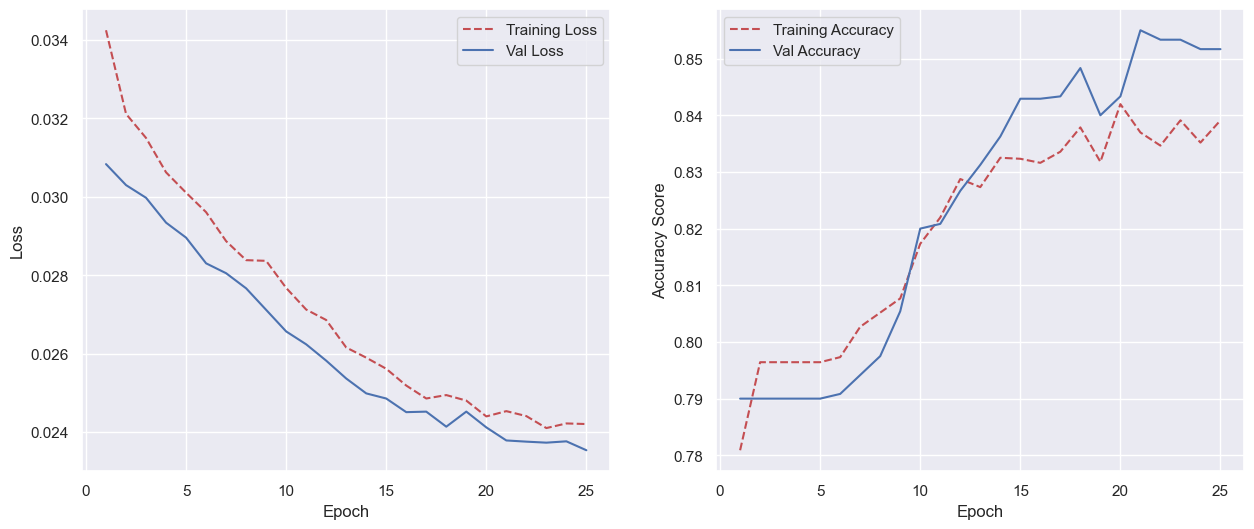

In [56]:
def createNetwork(X_train, loss=custom_loss, learning_rate=0.0005, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    
    return network_
network=createNetwork(X_train_scaled)
history = network.fit(X_train_scaled,
                            y_train,
                            epochs=25,
                            verbose=1,
                            batch_size=64,
                            #validation_split=0.3
                            validation_data=(X_val_scaled, y_val),
                            )
printHistory(history)

### Function for implementing various models

In [102]:
from typing import List
from tensorflow.keras.optimizers import SGD
def train_and_evaluate(X_train, y_train, X_test, y_test, X_val, y_val, imbalance: bool, loss: str = "binary_crossentropy", 
                       learning_rate: float = 0.0005, activation: str = "relu", epochs: int = 25, batch_size: int = 32, 
                       num_dense_layers: int = 4, dense_layer_units: List[int] = [64, 32, 16, 8],
                       optimizer_name: str = 'adam', monitor: str = "val_accuracy", patience: int = 5, 
                       kernel_regularizer = None, dropout: float = 0.0):
    # Create network
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate) 
    else:
        decay_rate = learning_rate / 25
        momentum = 0.8
        optimizer = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)


    network_ = Sequential()

    for i in range(num_dense_layers):
        units = dense_layer_units[i] if i < len(dense_layer_units) else dense_layer_units[-1]
        network_.add(Dense(units=units, activation=activation, kernel_regularizer=kernel_regularizer, input_shape=(X_train.shape[1],)))
       
    if dropout > 0.0:        
        network_.add(Dropout(dropout))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    # Set up early stopping callback
    early_stopping = EarlyStopping(
        monitor=monitor,
        patience=patience,
        verbose=1,
        restore_best_weights=True
    )
    # Define the learning rate schedule function
    def schedule(epoch, learning_rate):
        if epoch < 5:
            return learning_rate
        else:
            return learning_rate * 0.95

    # Create the learning rate scheduler callback
    lr_scheduler = LearningRateScheduler(schedule)

    # Train the model
    history = network_.fit(X_train,
                            y_train,
                            epochs=epochs,
                            verbose=1,
                            batch_size=batch_size,
                            callbacks=[early_stopping, lr_scheduler],
                            #validation_split=0.3
                            validation_data=(X_val, y_val)
                            )

    if imbalance:
        print("Accuracy for imbalanced data:")
    else:
        print("Accuracy for balanced data:")
    
    # Evaluate the model
    loss, accuracy = network_.evaluate(X_test, y_test)
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Add kernel regularization and dropout to training log
    history.params['kernel_regularizer'] = kernel_regularizer
    history.params['dropout'] = dropout
    
    return history, network_


### Model with imbalanced data

In [105]:
from tensorflow.keras import regularizers

log_path = "training_log.csv"

# Check if the log file exists and create it if it doesn't
try:
    log = pd.read_csv(log_path)
except FileNotFoundError:
    log = pd.DataFrame(columns=["imbalance", "accuracy", "loss", "learning_rate", "loss_function", "optimizer_name", "stopped_epoch", "epochs", "dense_layers", "dense_layer_units", "batch_size", "monitor", "patience", "kernel_regularizer", "dropout", "timestamp"])

params = {
    "imbalance": True,
    "loss": "binary_crossentropy",
    "learning_rate": 0.002,
    "activation": "relu",
    "epochs": 25,
    "batch_size": 64,
    "num_dense_layers": 5,
    "dense_layer_units": [128, 64, 32, 16, 8],
    "optimizer_name": "adam",
    "monitor": "val_accuracy",
    "patience": 8,
    "kernel_regularizer": regularizers.l2(0.000),
    "dropout": 0.3# omogucava modelu da bolje radi sa novim podacima i sprecava overfitting
}

# Train and evaluate the model
history_imbalanced, network_imbalanced = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test,X_val_scaled, y_val, **params)

# Save the training information to the log file
log_dict = {
    "imbalance": params["imbalance"],
    "accuracy": history_imbalanced.history["val_accuracy"][-1],
    "loss": history_imbalanced.history["val_loss"][-1],
    "learning_rate": params["learning_rate"],
    "loss_function": params["loss"],
    "optimizer_name": params["optimizer_name"],
    "stopped_epoch": getattr(history_imbalanced, "stopped_epoch", None),
    "epochs": len(history_imbalanced.epoch),
    "dense_layers": params["num_dense_layers"],
    "dense_layer_units": str(params["dense_layer_units"]),
    "batch_size": params["batch_size"],
    "monitor": params["monitor"],
    "patience": params["patience"],
    "kernel_regularizer": str(params["kernel_regularizer"]),
    "dropout": params["dropout"],
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

log = log.append(log_dict, ignore_index=True)
log.to_csv(log_path, index=False)


Epoch 1/25
88/88 [==============================] - 8s 30ms/step - loss: 0.5141 - accuracy: 0.7932 - val_loss: 0.4588 - val_accuracy: 0.7900 - lr: 0.0020
Epoch 2/25
88/88 [==============================] - 1s 16ms/step - loss: 0.4675 - accuracy: 0.8039 - val_loss: 0.4298 - val_accuracy: 0.8150 - lr: 0.0020
Epoch 3/25
88/88 [==============================] - 1s 14ms/step - loss: 0.4396 - accuracy: 0.8246 - val_loss: 0.4153 - val_accuracy: 0.8208 - lr: 0.0020
Epoch 4/25
88/88 [==============================] - 3s 38ms/step - loss: 0.4239 - accuracy: 0.8309 - val_loss: 0.3881 - val_accuracy: 0.8413 - lr: 0.0020
Epoch 5/25
88/88 [==============================] - 2s 21ms/step - loss: 0.3962 - accuracy: 0.8418 - val_loss: 0.3706 - val_accuracy: 0.8537 - lr: 0.0020
Epoch 6/25
88/88 [==============================] - 2s 18ms/step - loss: 0.3747 - accuracy: 0.8536 - val_loss: 0.3830 - val_accuracy: 0.8429 - lr: 0.0019
Epoch 7/25
88/88 [==============================] - 3s 29ms/step - loss: 0.3

C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_19824\1187532656.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_dict, ignore_index=True)


In [106]:
# Train the model with the balanced data

log_path = "training_log.csv"

# Check if the log file exists and create it if it doesn't
try:
    log = pd.read_csv(log_path)
except FileNotFoundError:
    log = pd.DataFrame(columns=["imbalance", "accuracy", "loss", "learning_rate", "loss_function", "optimizer_name", "stopped_epoch", "epochs", "dense_layers", "dense_layer_units", "batch_size", "monitor", "patience", "kernel_regularizer", "dropout", "timestamp"])

params = {
    "imbalance": False,
    "loss": "binary_crossentropy",
    "learning_rate": 0.002,
    "activation": "relu",
    "epochs": 25,
    "batch_size": 128,
    "num_dense_layers": 4,
    "dense_layer_units": [64, 32, 16, 8],
    "optimizer_name": "adam",
    "monitor": "val_accuracy",
    "patience": 8,
    "kernel_regularizer": regularizers.l2(0.000),
    "dropout": 0.3
}

# Train and evaluate the model
history_balanced, network_balanced = train_and_evaluate(X_train_balanced_scaled, y_train_balanced, X_test_balanced_scaled, y_test_balanced,X_val_balanced_scaled, y_val_balanced, **params)

# Save the training information to the log file
log_dict = {
    "imbalance": params["imbalance"],
    "accuracy": history_balanced.history["val_accuracy"][-1],
    "loss": history_balanced.history["val_loss"][-1],
    "learning_rate": params["learning_rate"],
    "loss_function": params["loss"],
    "optimizer_name": params["optimizer_name"],
    "stopped_epoch": getattr(history_balanced, "stopped_epoch", None),
    "epochs": len(history_balanced.epoch),
    "dense_layers": params["num_dense_layers"],
    "dense_layer_units": str(params["dense_layer_units"]),
    "batch_size": params["batch_size"],
    "monitor": params["monitor"],
    "patience": params["patience"],
    "kernel_regularizer": str(params["kernel_regularizer"]),
    "dropout": params["dropout"],
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

log = log.append(log_dict, ignore_index=True)
log.to_csv(log_path, index=False)


Epoch 1/25
70/70 [==============================] - 28s 267ms/step - loss: 0.6549 - accuracy: 0.6106 - val_loss: 0.6072 - val_accuracy: 0.6748 - lr: 0.0020
Epoch 2/25
70/70 [==============================] - 4s 52ms/step - loss: 0.6014 - accuracy: 0.6926 - val_loss: 0.5610 - val_accuracy: 0.7242 - lr: 0.0020
Epoch 3/25
70/70 [==============================] - 8s 110ms/step - loss: 0.5635 - accuracy: 0.7248 - val_loss: 0.5320 - val_accuracy: 0.7499 - lr: 0.0020
Epoch 4/25
70/70 [==============================] - 9s 132ms/step - loss: 0.5271 - accuracy: 0.7501 - val_loss: 0.4987 - val_accuracy: 0.7564 - lr: 0.0020
Epoch 5/25
70/70 [==============================] - 5s 66ms/step - loss: 0.4977 - accuracy: 0.7667 - val_loss: 0.4795 - val_accuracy: 0.7658 - lr: 0.0020
Epoch 6/25
70/70 [==============================] - 1s 16ms/step - loss: 0.4848 - accuracy: 0.7769 - val_loss: 0.4767 - val_accuracy: 0.7622 - lr: 0.0019
Epoch 7/25
70/70 [==============================] - 1s 18ms/step - loss:

C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_19824\2477525146.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_dict, ignore_index=True)


### Display of the best values of test parameters

In [107]:
# Print the best validation accuracy achieved with imbalanced data
best_epoch_imbalanced = np.argmax(history_imbalanced.history["val_accuracy"])
best_val_acc_imbalanced = history_imbalanced.history["val_accuracy"][best_epoch_imbalanced]
print(f"The best validation accuracy of {best_val_acc_imbalanced:.4f} was achieved with imbalanced data at epoch {best_epoch_imbalanced+1}")

# Print the best validation accuracy achieved with balanced data
best_epoch_balanced = np.argmax(history_balanced.history["val_accuracy"])
best_val_acc_balanced = history_balanced.history["val_accuracy"][best_epoch_balanced]
print(f"The best validation accuracy of {best_val_acc_balanced:.4f} was achieved with balanced data at epoch {best_epoch_balanced+1}")

The best validation accuracy of 0.8621 was achieved with imbalanced data at epoch 21
The best validation accuracy of 0.7896 was achieved with balanced data at epoch 21


### Minimum and maximum difference of the loss parameter across epochs

In [108]:
# Calculate the maximum and minimum differences between loss in epochs for the imbalanced dataset
loss_values_imbalanced = history_imbalanced.history['loss']
diff_imbalanced = np.diff(loss_values_imbalanced)
print("Maximum difference between loss in epochs (imbalanced):", np.max(diff_imbalanced))
print("Minimum difference between loss in epochs (imbalanced):", np.min(diff_imbalanced))

# Calculate the maximum and minimum differences between loss in epochs for the balanced dataset
loss_values_balanced = history_balanced.history['loss']
diff_balanced = np.diff(loss_values_balanced)
print("Maximum difference between loss in epochs (balanced):", np.max(diff_balanced))
print("Minimum difference between loss in epochs (balanced):", np.min(diff_balanced))

if np.min(diff_imbalanced) < np.min(diff_balanced):
    print("The minimum difference between loss in epochs is smaller for the imbalanced dataset.")
else:
    print("The minimum difference between loss in epochs is smaller for the balanced dataset.")

if np.max(diff_imbalanced) < np.max(diff_balanced):
    print("Smaller maximum difference is for the imbalanced dataset.")
else:
    print("Smaller maximum difference is for the balanced dataset.")


Maximum difference between loss in epochs (imbalanced): 0.001273125410079956
Minimum difference between loss in epochs (imbalanced): -0.04657045006752014
Maximum difference between loss in epochs (balanced): 0.0037119388580322266
Minimum difference between loss in epochs (balanced): -0.05351155996322632
The minimum difference between loss in epochs is smaller for the balanced dataset.
Smaller maximum difference is for the imbalanced dataset.


### Comparison of loss and accuracy values for each processed epoch

History for imbalanced dataset:


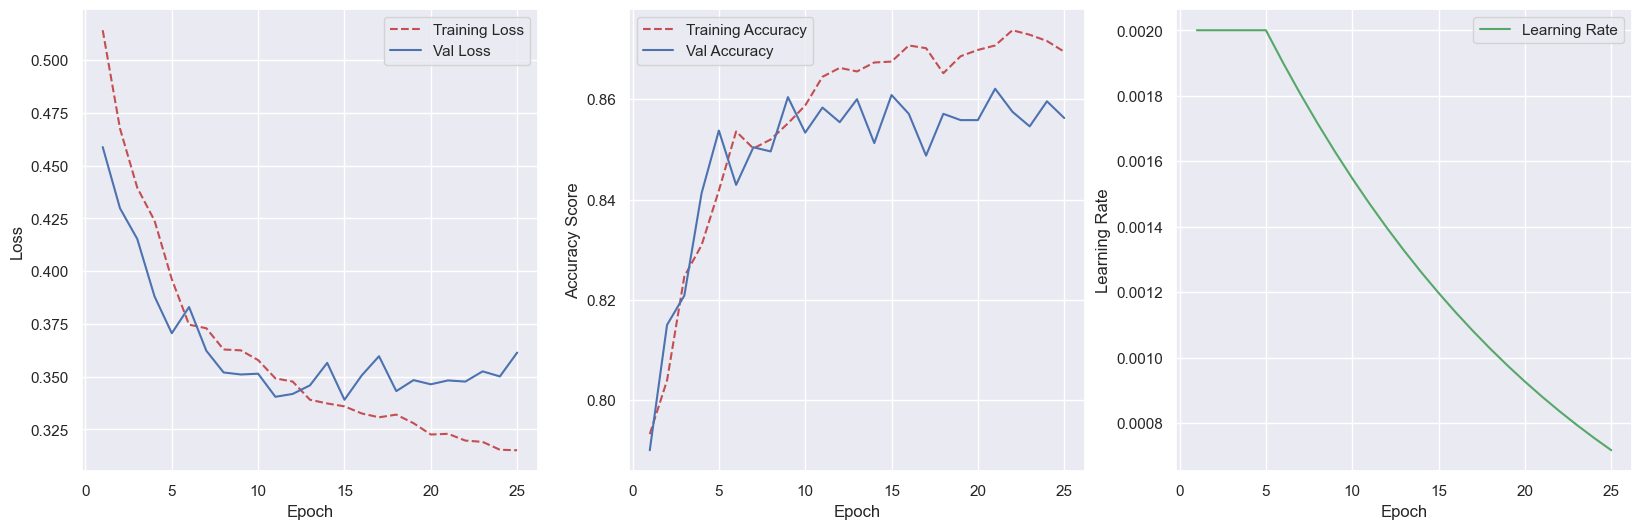

History for balanced dataset:


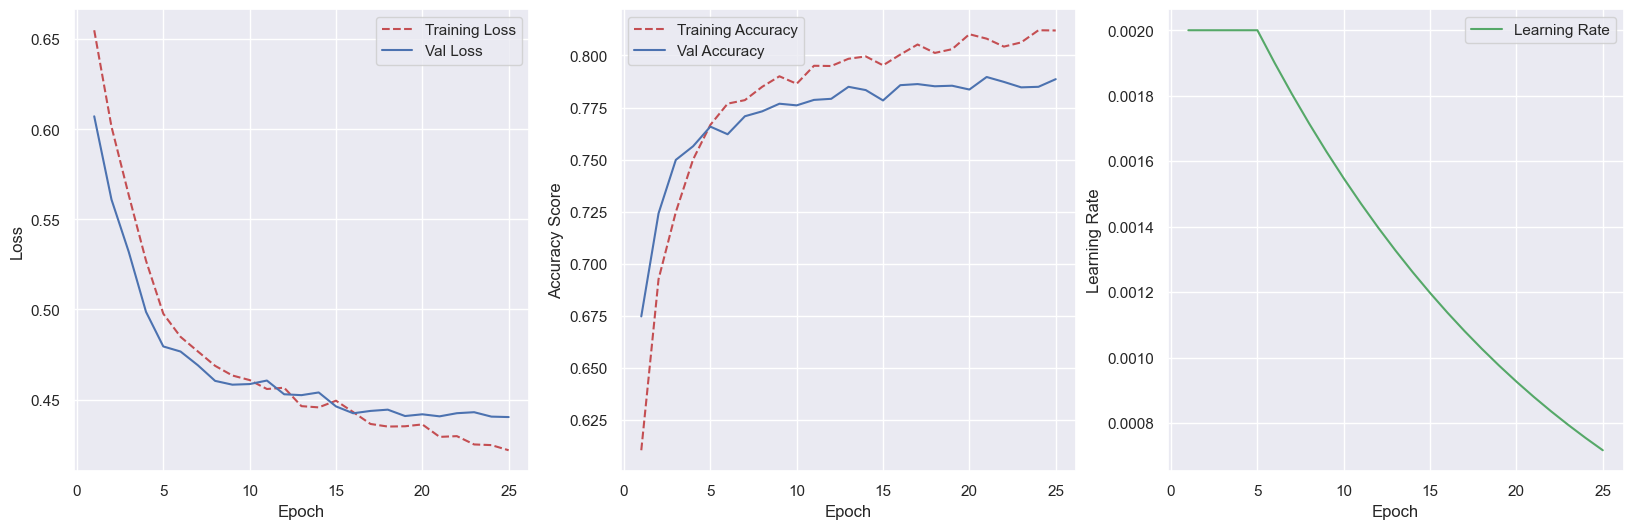

In [109]:
print("History for imbalanced dataset:")
printHistory2(history_imbalanced)

# Print history for the balanced network
print("History for balanced dataset:")
printHistory2(history_balanced)

### Results of prediction

In [63]:
y_pred_imbalanced = network_imbalanced.predict(X_test_scaled)
test_loss_imbalanced, test_acc_imbalanced = network_imbalanced.evaluate(X_test_scaled, y_test)
print('Test loss (imbalanced):', test_loss_imbalanced)
print('Test accuracy (imbalanced):', test_acc_imbalanced*100)

y_pred_balanced = network_balanced.predict(X_test_balanced_scaled)
test_loss_balanced, test_acc_balanced = network_balanced.evaluate(X_test_balanced_scaled, y_test_balanced)
print('Test loss (balanced):', test_loss_balanced)
print('Test accuracy (balanced):', test_acc_balanced*100)


63/63 [==============================] - 1s 8ms/step - loss: 0.3517 - accuracy: 0.8600
Test loss (imbalanced): 0.3517210781574249
Test accuracy (imbalanced): 86.00000143051147
100/100 [==============================] - 2s 16ms/step - loss: 0.4611 - accuracy: 0.7693
Test loss (balanced): 0.46111929416656494
Test accuracy (balanced): 76.93032026290894


In [64]:
y_pred_imbalanced = (y_pred_imbalanced > 0.5)*1
num_zeros_imbalanced = sum(y_pred_imbalanced == 0)
num_ones_imbalanced = sum(y_pred_imbalanced == 1)
print(f"Number of zeros in y_pred (imbalanced): {num_zeros_imbalanced}")
print(f"Number of ones in y_pred (imbalanced): {num_ones_imbalanced}")

y_pred_balanced = (y_pred_balanced > 0.5) * 1
num_zeros_balanced = sum(y_pred_balanced == 0)
num_ones_balanced = sum(y_pred_balanced == 1)
print(f"Number of zeros in y_pred (balanced): {num_zeros_balanced}")
print(f"Number of ones in y_pred (balanced): {num_ones_balanced}")

Number of zeros in y_pred (imbalanced): [1783]
Number of ones in y_pred (imbalanced): [217]
Number of zeros in y_pred (balanced): [1506]
Number of ones in y_pred (balanced): [1680]


### Confusion matrix

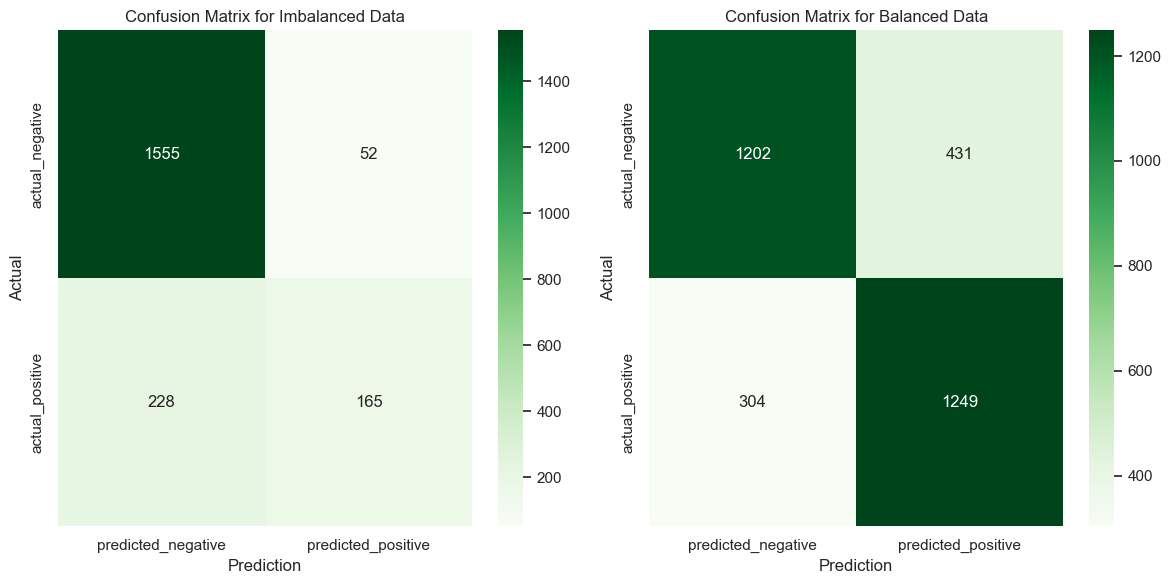

In [65]:
# Compute confusion matrix and plot heatmap for imbalanced dataset
plt.figure(figsize=(12, 6))
cf_matrix_imbalanced = confusion_matrix(y_test, y_pred_imbalanced)
plt.subplot(1, 2, 1)
sns.heatmap(cf_matrix_imbalanced, annot=True, fmt='.0f', cmap='Greens', 
            xticklabels=['predicted_negative', 'predicted_positive'],
            yticklabels=['actual_negative', 'actual_positive'])
plt.title('Confusion Matrix for Imbalanced Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Compute confusion matrix and plot heatmap for balanced dataset
cf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
plt.subplot(1, 2, 2)
sns.heatmap(cf_matrix_balanced, annot=True, fmt='.0f', cmap='Greens', 
            xticklabels=['predicted_negative', 'predicted_positive'],
            yticklabels=['actual_negative', 'actual_positive'])
plt.title('Confusion Matrix for Balanced Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')

plt.tight_layout()


plt.show()





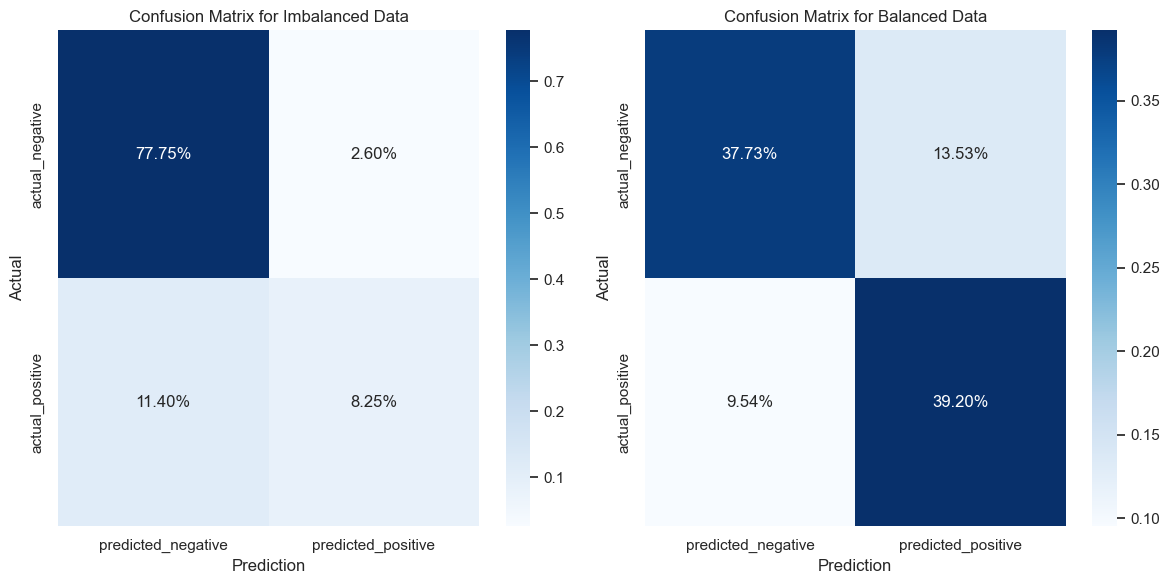

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for imbalanced data
cf_matrix_imbalanced = confusion_matrix(y_test, y_pred_imbalanced)
sns.heatmap(cf_matrix_imbalanced/np.sum(cf_matrix_imbalanced), annot=True, 
            fmt='.2%', cmap='Blues', 
            xticklabels=['predicted_negative', 'predicted_positive'],
            yticklabels=['actual_negative', 'actual_positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix for Imbalanced Data')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for balanced data
cf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
sns.heatmap(cf_matrix_balanced/np.sum(cf_matrix_balanced), annot=True, 
            fmt='.2%', cmap='Blues', 
            xticklabels=['predicted_negative', 'predicted_positive'],
            yticklabels=['actual_negative', 'actual_positive'], ax=axes[1])
axes[1].set_title('Confusion Matrix for Balanced Data')
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Roc curve

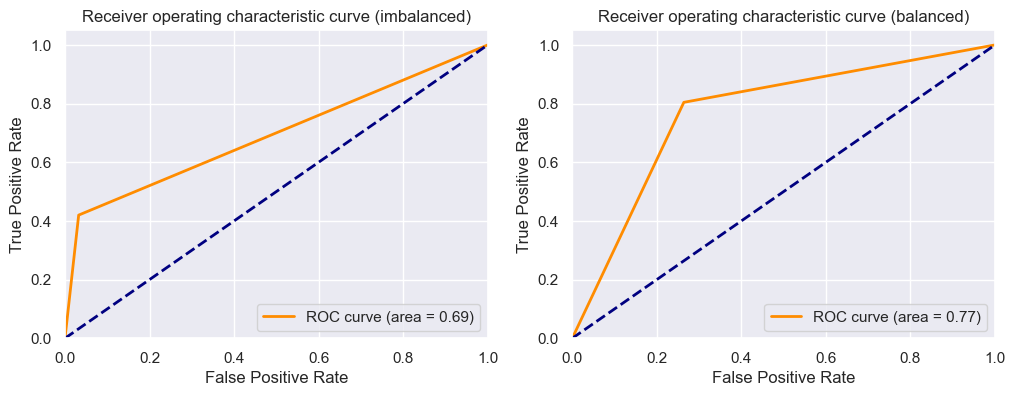

In [67]:
# Compute fpr, tpr, thresholds and auc for imbalanced dataset


fpr_imbalanced, tpr_imbalanced, thresholds_imbalanced = roc_curve(y_test, y_pred_imbalanced)
roc_auc_imbalanced = auc(fpr_imbalanced, tpr_imbalanced)

# Compute fpr, tpr, thresholds and auc for balanced dataset
fpr_balanced, tpr_balanced, thresholds_balanced = roc_curve(y_test_balanced, y_pred_balanced)
roc_auc_balanced = auc(fpr_balanced, tpr_balanced)

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot ROC curve for imbalanced dataset
axs[0].plot(fpr_imbalanced, tpr_imbalanced, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_imbalanced)
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver operating characteristic curve (imbalanced)')
axs[0].legend(loc="lower right")

# Plot ROC curve for balanced dataset
axs[1].plot(fpr_balanced, tpr_balanced, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_balanced)
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic curve (balanced)')
axs[1].legend(loc="lower right")

plt.show()

